In [3]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv('weight-height.csv')

In [7]:
df.sample(5)

,Gender,Height,Weight
3497,Male,70.542201,210.198845
2809,Male,62.948682,150.670938
5257,Female,61.124727,117.388949
5507,Female,66.700652,173.532518
7739,Female,61.576625,109.076317


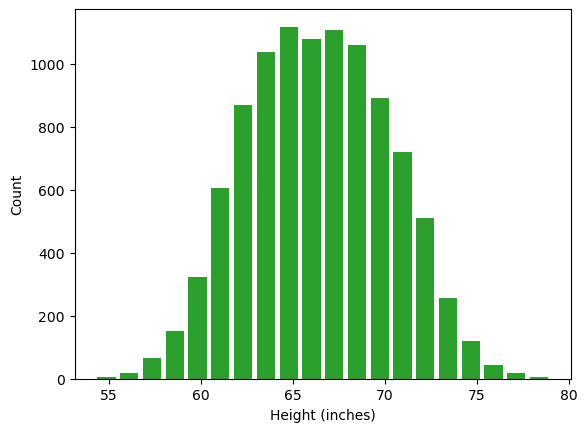

In [47]:
plt.hist(df.Height, bins=20, rwidth=0.8)

plt.xlabel('Height (inches)')
plt.ylabel('Count')
plt.show()

In [49]:
df.Height.mean()

66.36755975482124

In [51]:
df.Height.std()

3.8475281207732324

### (1) Outlier detection and removal using 3 standard deviation

In [56]:
upper_limit = df.Height.mean() + 3*df.Height.std()
upper_limit

77.91014411714094

In [60]:
lower_limit = df.Height.mean() -3*df.Height.std()
lower_limit

54.82497539250154

In [64]:
df[(df.Height>upper_limit) | (df.Height<lower_limit)]

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
9285,Female,54.263133,64.700127


In [68]:
df_no_outlier_std_dev = df[(df.Height<upper_limit) & (df.Height>lower_limit)]
df_no_outlier_std_dev.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [70]:
df_no_outlier_std_dev.shape

(9993, 3)

In [74]:
df.shape

(10000, 3)

### Outlier detection and removal using Z Score

In [79]:
df['zscore'] = ( df.Height - df.Height.mean() ) / df.Height.std()
df.head(5)

,Gender,Height,Weight,zscore
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375


In [85]:
df[df['zscore']>3]

,Gender,Height,Weight,zscore
994,Male,78.095867,255.690835,3.048271
1317,Male,78.462053,227.342565,3.143445
2014,Male,78.998742,269.989699,3.282934
3285,Male,78.528210,253.889004,3.160640
3757,Male,78.621374,245.733783,3.184854


In [87]:
df[(df.zscore<-3) | (df.zscore>3)]

,Gender,Height,Weight,zscore
994,Male,78.095867,255.690835,3.048271
1317,Male,78.462053,227.342565,3.143445
2014,Male,78.998742,269.989699,3.282934
3285,Male,78.528210,253.889004,3.160640
3757,Male,78.621374,245.733783,3.184854
6624,Female,54.616858,71.393749,-3.054091
9285,Female,54.263133,64.700127,-3.146027


In [89]:
df_no_outliers = df[(df.zscore>-3) & (df.zscore<3)]
df_no_outliers.head()

,Gender,Height,Weight,zscore
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375


In [91]:
df_no_outliers.shape

(9993, 4)

In [93]:
df.shape

(10000, 4)